# Proyek Pertama : Predictive Analytics

Disusun oleh :

Nama : Muhammad Nurul Fatwa Al Fajar

ID : mc009d5y0699

Email : mc009d5y0699@student.devacademy.id

Link Dataset : https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

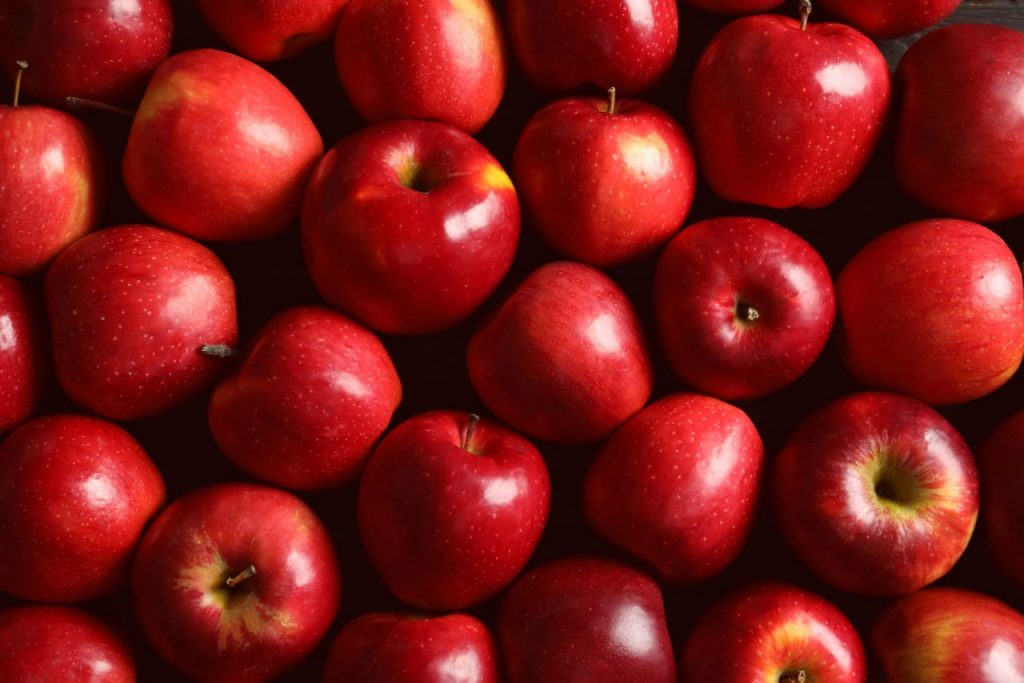

# Uraian Proyek

Gambaran Latar Belakang Proyek Penilaian Kualitas Apel dengan Algoritma Machine Learning

Proyek ini bertujuan untuk merancang sebuah model machine learning guna memperkirakan kualitas apel secara lebih tepat dan efisien. Pada praktik saat ini, penilaian mutu apel masih dilakukan secara manual, yang memerlukan waktu dan tenaga cukup besar serta berisiko menimbulkan kesalahan. Kondisi ini dapat menimbulkan kerugian bagi para petani maupun distributor itu sendiri, serta mengakibatkan ketidaksesuaian produk dengan ekspektasi konsumen yang memakannya. Dengan adanya model prediksi berbasis machine learning, permasalahan tersebut dapat diminimalisir melalui pendekatan yang lebih akurat, efisien, dan bersifat transparan.

# 1. Memuat Library yang Diperlukan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Memuat Library untuk Pengambilan dan Pemrosesan Data
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Library untuk Membagi Data Menjadi Data Latih dan Uji
from sklearn.model_selection import train_test_split

# Library untuk Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

# Library untuk Model Klasifikasi
from sklearn.neighbors import KNeighborsClassifier# Model K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier# Model Random Forest
from sklearn.metrics import accuracy_score# Metode Evaluasi Akurasi
from sklearn.svm import SVC# Model Support Vector Machine
from sklearn.naive_bayes import BernoulliNB# Model Naive Bayes (Bernoulli)
from sklearn.ensemble import ExtraTreesClassifier# Model Extra Trees Classifier


# 2. Data Understanding

Data Understanding atau pemahaman data merupakan tahap untuk mengerti isi dari data yang dimiliki serta menilai sejauh mana kualitas data tersebut dapat mendukung proses analisis

# 2.1 Data Loading

Data Loading merupakan tahap awal dalam proses analisis data yang bertujuan untuk memuat dataset yang akan digunakan, sehingga memudahkan proses pemahaman terhadap data tersebut. Adapun informasi dalam dataset ini telah melalui proses pembersihan dan normalisasi oleh pihak penyedia, sehingga dataset menjadi lebih mudah digunakan, terutama bagi pemula.

## Informasi Dataset

| Tipe    | Keterangan                                      |
|-----------|--------------------------------------------------|
| Title     | Apple Quality                                    |
| Source    | Kaggle                                           |
| Maintainer| Nidula Elgiriyewithana                         |
| License   | Other (specified in description)                 |
| Visibility| Public                                           |
| Tags      | Computer Science, Education, Food, Data Visualization, Classification,Exploratory Data Analysis |
| Usability | 10.00                                            |


In [3]:
data = pd.read_csv('/content/drive/My Drive/Predictive Analytics Fajar/apple_quality.csv')

# 2.2 Exploratory Data Analysis (EDA)

Analisis data eksploratif adalah tahap awal dalam memahami data yang dilakukan untuk menggali karakteristik utama, mengidentifikasi pola, mendeteksi keanehan, serta mengevaluasi asumsi yang mungkin ada. Proses ini umumnya memanfaatkan metode statistik serta visualisasi untuk mempermudah pemahaman data secara menyeluruh.

## 2.2.1 EDA – Uraian Variabel

In [4]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


Dari DataFrame yang ditampilkan sebelumnya, kita dapat mengamati bahwa dataset ini memuat 9 fitur atau kolom, yaitu:


- A_id : Merupakan identitas unik untuk masing-masing apel

- Size : Menunjukkan ukuran dari apel

- Weight : Mewakili massa atau bobot apel

- Sweetness : Menggambarkan seberapa manis rasa apel

- Crunchiness : Menunjukkan tingkat kerenyahan dari tekstur apel

- Juiciness : Mengindikasikan seberapa segar atau berair apel tersebut

- Ripeness : Menggambarkan level kematangan buah

- Acidity : Menyatakan kadar keasaman yang dimiliki apel

- Quality : Menjadi indikator penilaian kualitas keseluruhan apel

In [5]:
data.drop("A_id", axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


Berdasarkan hasil dari metode df.info(), dapat disimpulkan bahwa:

- Enam kolom memiliki tipe data numerik float64, yaitu: Size, Weight, Sweetness, Crunchiness, Juiciness, dan Ripeness.

- Dua kolom lainnya bertipe data object, yaitu: Acidity dan Quality.

Meskipun begitu, pada data sebenarnya, kolom Acidity seharusnya bertipe numerik (float64). Oleh karena itu, kita akan melakukan konversi tipe data pada kolom tersebut agar sesuai dengan format yang semestinya.

In [7]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Metode describe() digunakan untuk menampilkan ringkasan statistik dari setiap kolom dalam dataset, meliputi:

- Count: Jumlah entri atau data yang tersedia dalam setiap kolom.

- Mean: Nilai rata-rata dari data pada masing-masing kolom.

- Std: Menunjukkan standar deviasi, yang merepresentasikan sebaran data dari nilai rata-ratanya.

- Min: Nilai terkecil yang ditemukan pada kolom tersebut.

- 25%: Merupakan kuartil pertama, yaitu batas nilai di mana 25% data berada di bawahnya.

- 50%: Dikenal juga sebagai median atau kuartil kedua, merupakan nilai tengah dari distribusi data.

- 75%: Kuartil ketiga, yang menandai bahwa 75% dari data berada di bawah nilai ini.

- Max: Nilai terbesar dalam setiap kolom.

In [8]:
data.shape

(4001, 8)

Hasil dari pemanggilan data.shape menunjukkan bahwa:

## Informasi Dataset

| Jumlah baris Yang Ada    | Jumlah Kolom Yang Ada             |
|--------------------------|-----------------------------------|
| 4001                     | 8                                 |


## 2.2.2 EDA - Penyesuaian Terhadap Missing Value dan Outlier

In [9]:
data.duplicated().sum()

np.int64(0)

Memeriksa keberadaan data yang muncul lebih dari satu kali.

In [10]:
data.isnull().sum()

,0
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [11]:
data_miss = data[data.isnull().any(axis=1)]
data_miss

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Terlihat bahwa terdapat data yang hilang, dan akan kita buang dari dataset.

In [12]:
data.dropna(inplace=True)
data.isnull().sum().sum()

np.int64(0)

In [13]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [14]:
data["Acidity"] = data["Acidity"].astype("float64")

Mengonversi tipe data pada kolom Acidity menjadi float64.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Terlihat bahwa terdapat 7 kolom bertipe data float64 dan 1 kolom bertipe object.

In [16]:
data.shape

(4000, 8)

Setelah menghapus data yang hilang, jumlah dataset kini menjadi 4000.

**Visualisasi Outlier**

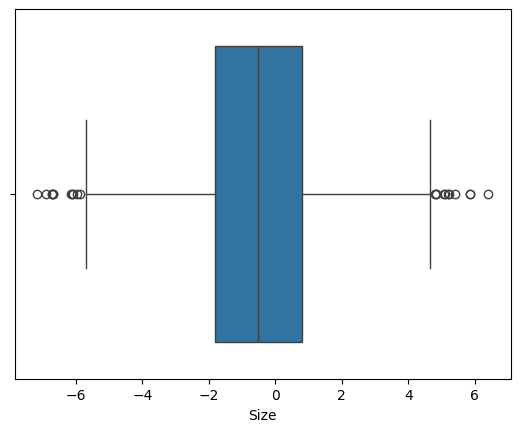

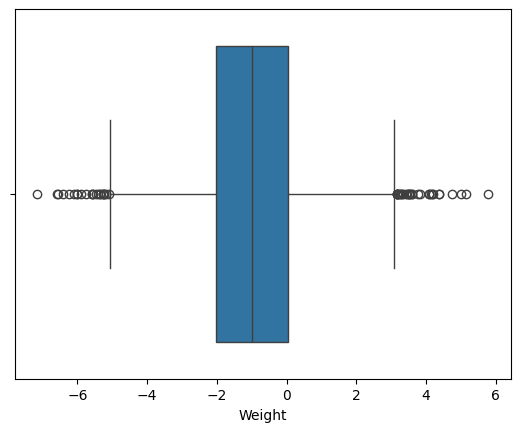

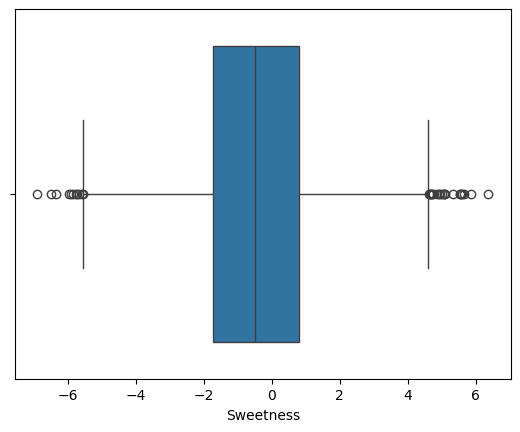

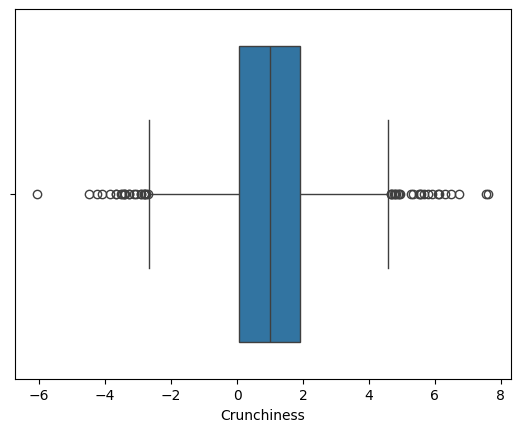

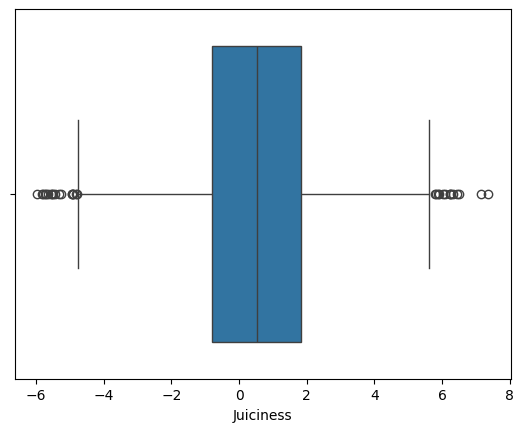

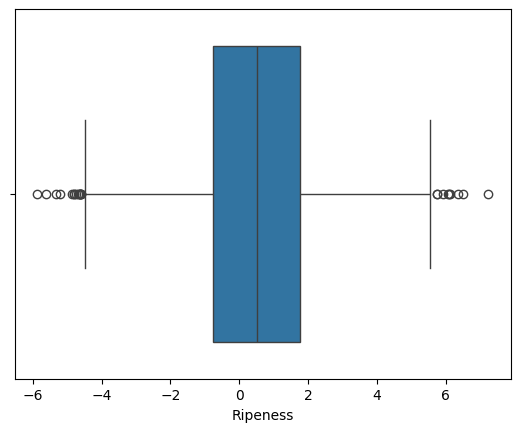

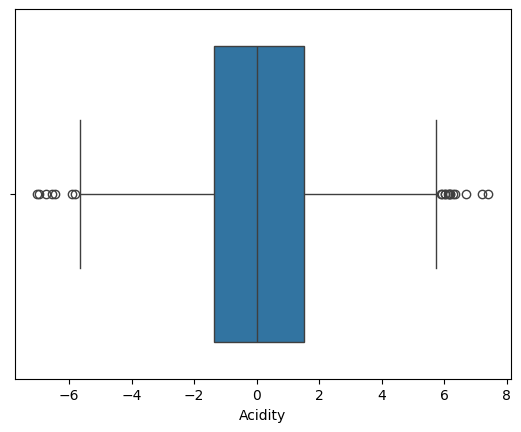

In [17]:
data_outlier=data.select_dtypes(exclude=['object'])
for column in data_outlier:
        plt.figure()
        sns.boxplot(data=data_outlier, x=column)


**Mengeliminasi Outlier dari Dataset**

Dalam kasus ini, kita akan mengidentifikasi nilai-nilai pencilan (outlier) menggunakan metode visualisasi data, yaitu boxplot. Setelah itu, kita akan mengatasi nilai pencilan tersebut dengan menerapkan metode Interquartile Range (IQR).

IQR (Interquartile Range) adalah rentang antar kuartil, dihitung dengan rumus:

    IQR = Kuartil Ketiga (Q3) - Kuartil Pertama (Q1)


In [18]:
# Q1 and Q3 calculation and IQR on the numerical columns
Q1 = data_outlier.quantile(0.25)
Q3 = data_outlier.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier mask based on the numerical columns
outlier_mask = ((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the original DataFrame using the outlier mask
data = data[~outlier_mask]

In [19]:
data.shape

(3790, 8)

Total data yang tersisa setelah outlier dihapus: 3790 baris, 8 kolom

# 2.2.3 EDA - Univariate Analysis ( Analisis Univariate )

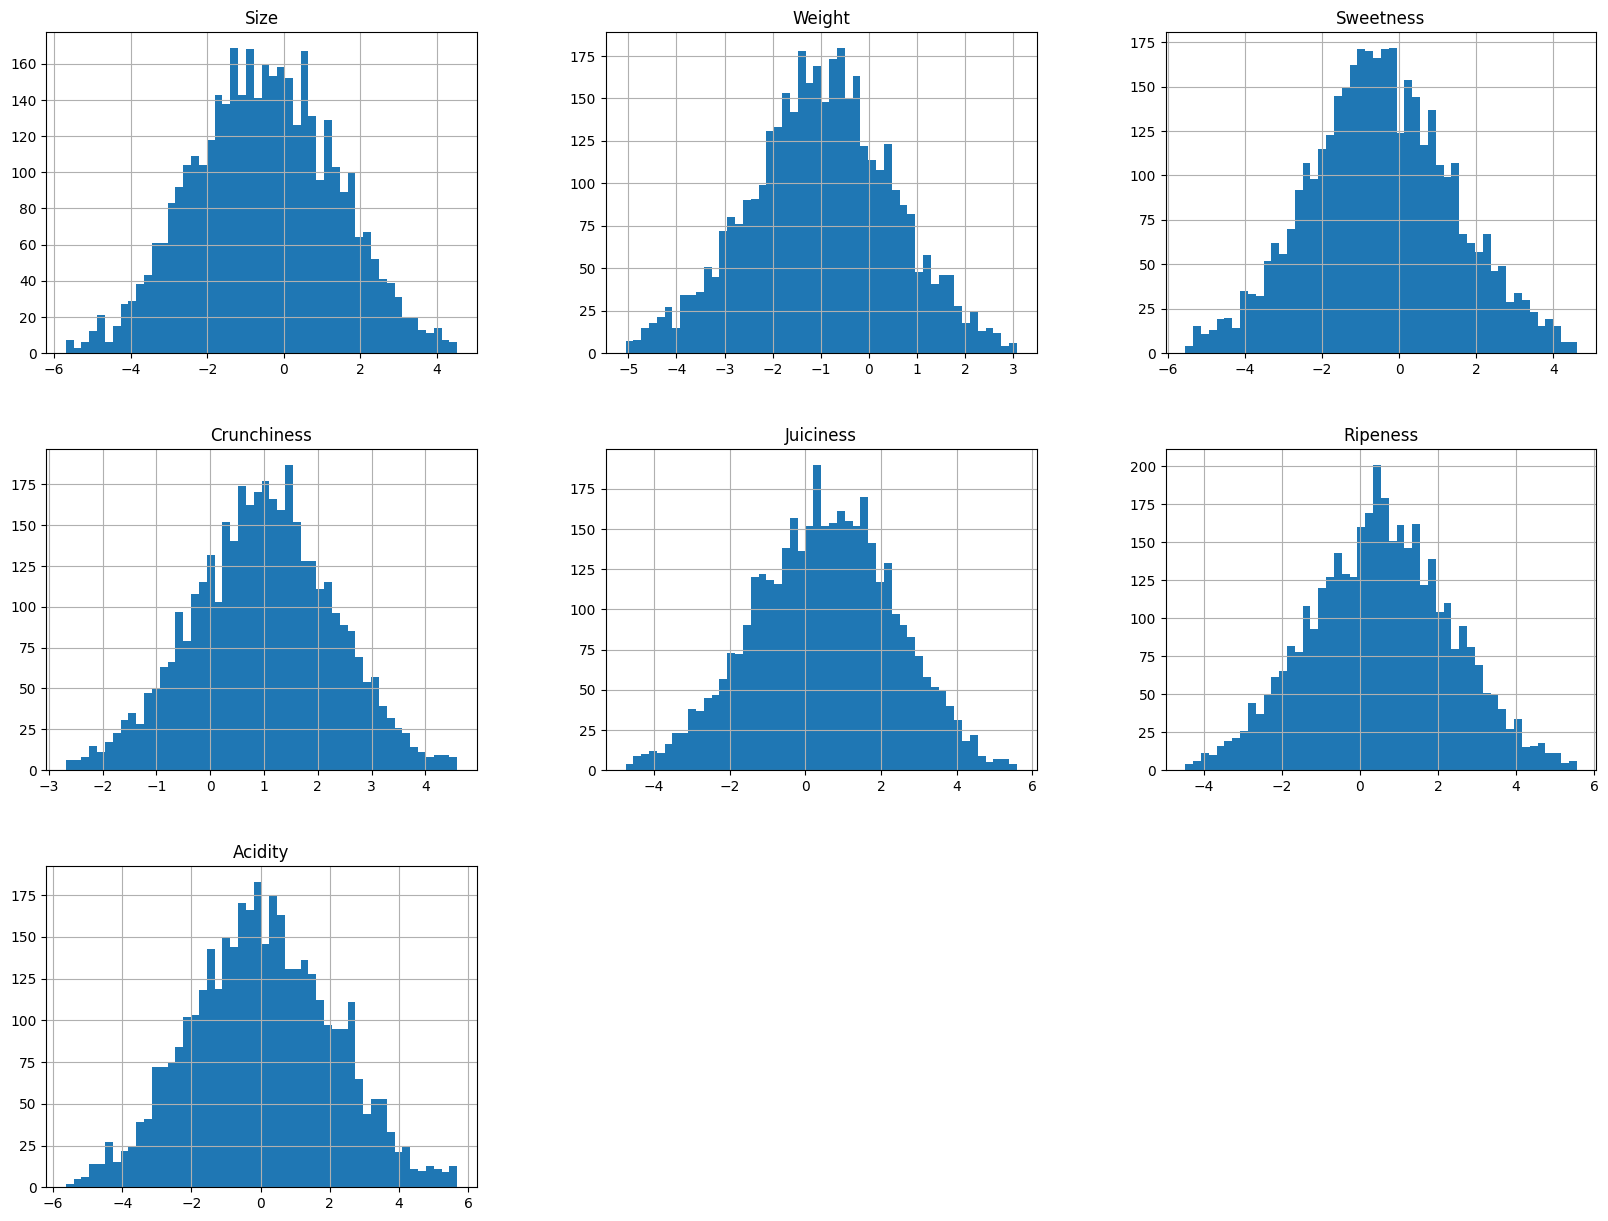

In [20]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# 2.2.4 EDA - Multivariate Analysis (Analisis Multivariat)

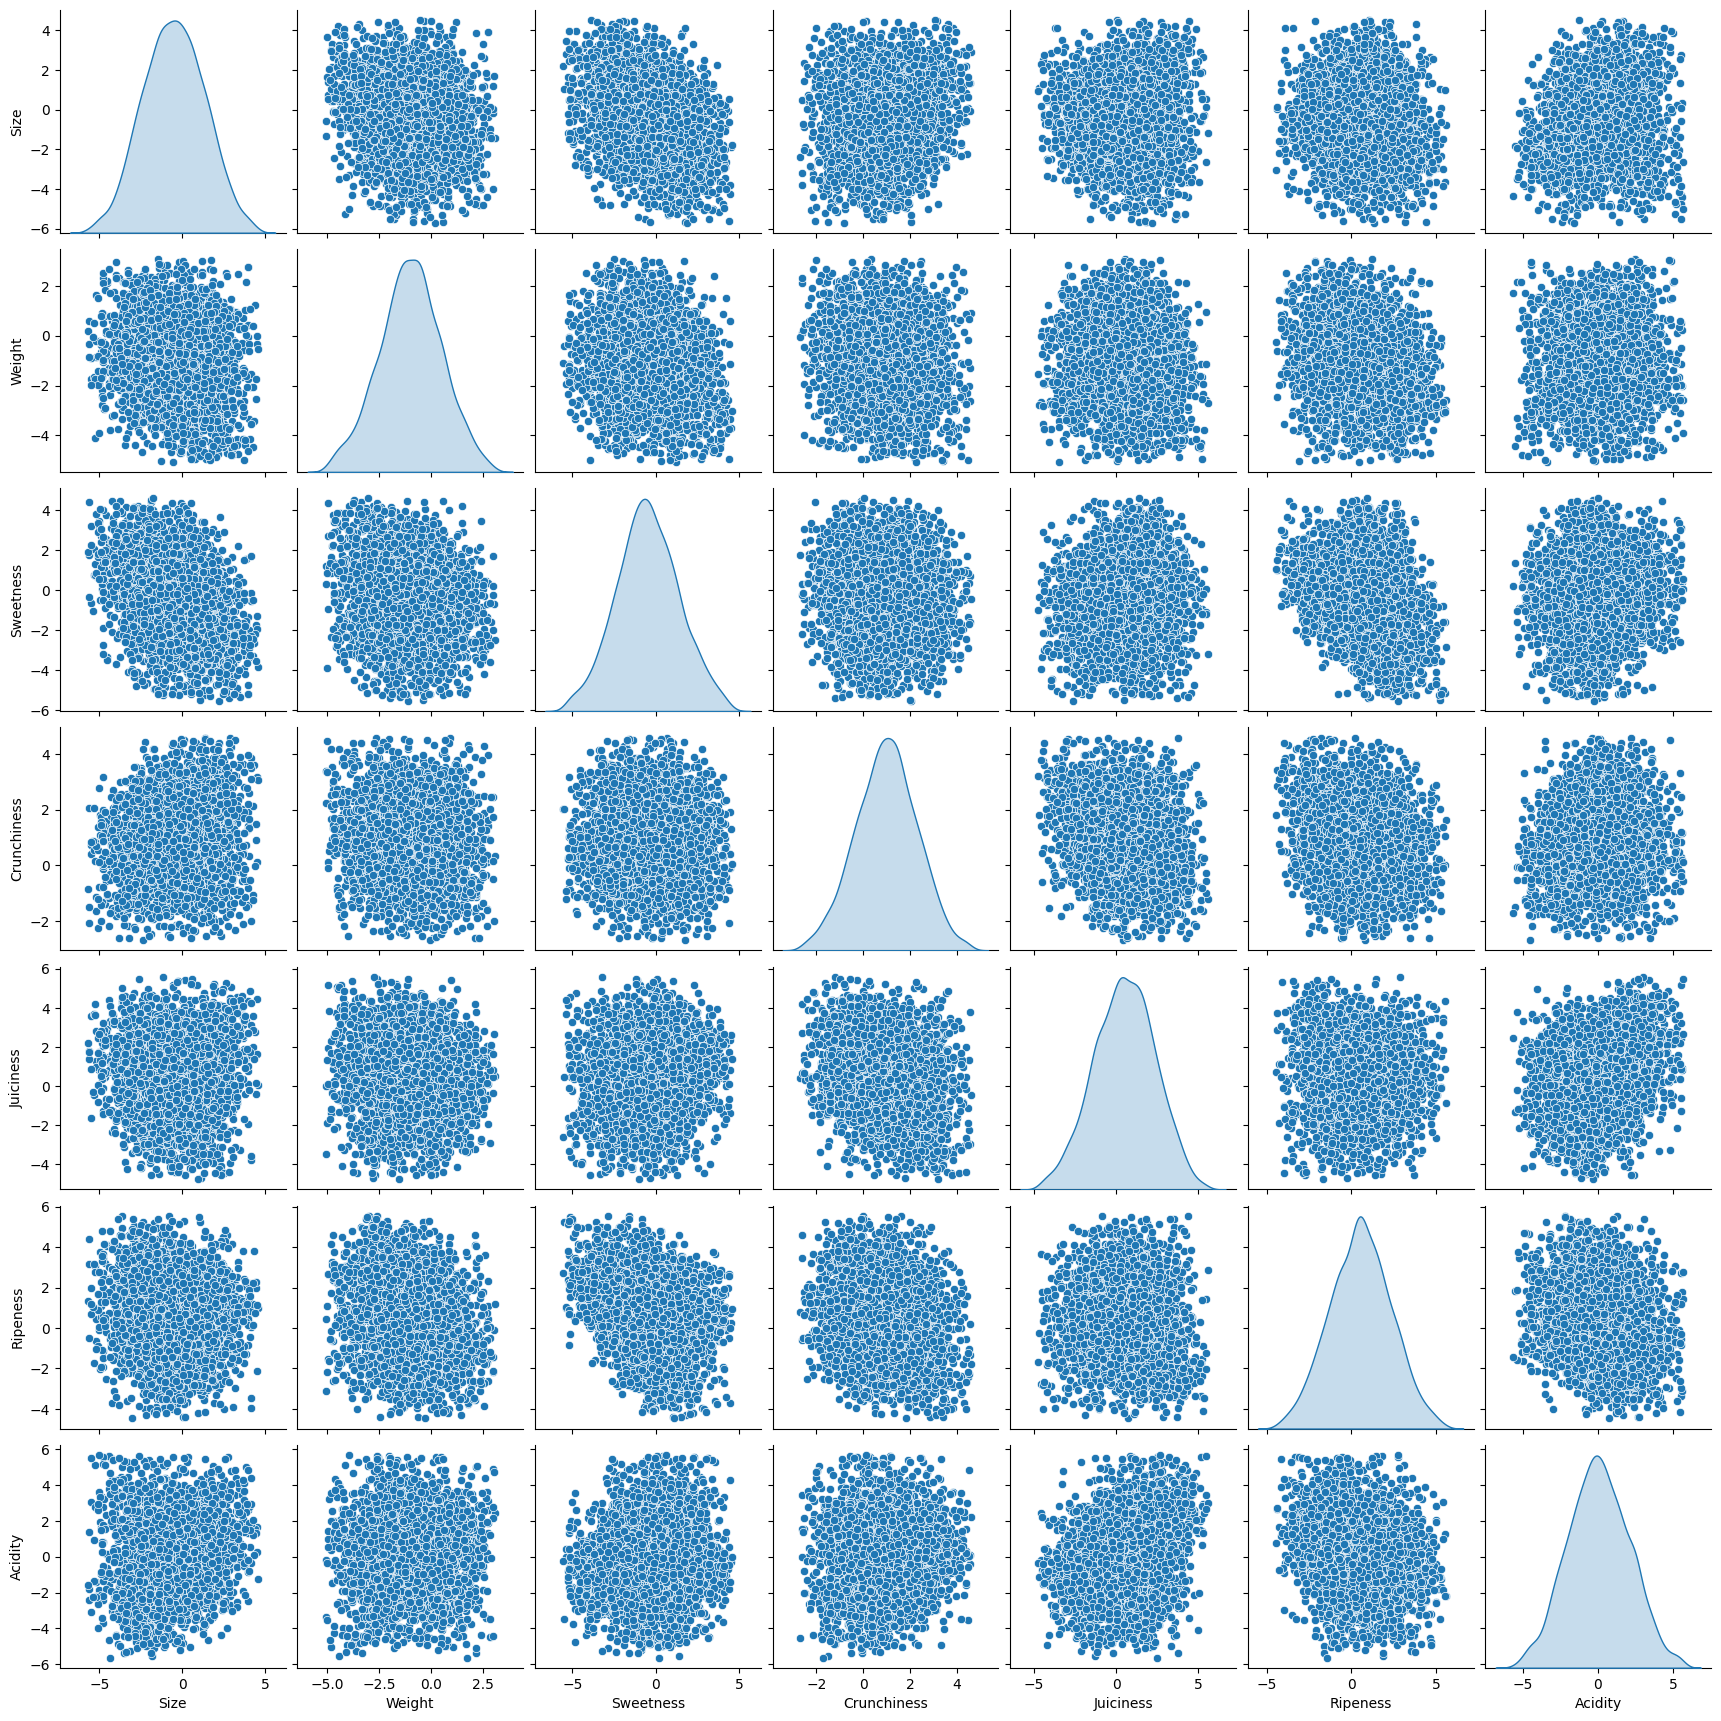

In [21]:
sns.pairplot(data, diag_kind = 'kde')

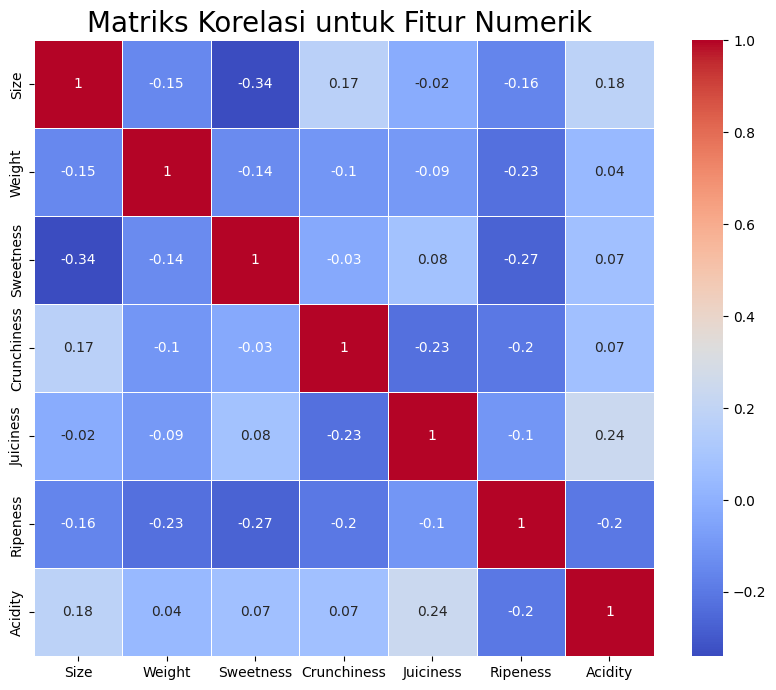

In [22]:
# Identify numeric columns
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
# Calculate correlation matrix only for numeric columns
correlation_matrix = numeric_data.corr().round(2) # Changed to numeric_data

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title(f"Matriks Korelasi untuk Fitur Numerik ", size=20)
plt.show()

# 3. Data Preparation ( Persiapan Data )

In [23]:
data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)  # good:1 , bad:0

<ipython-input-23-dd7cf7ab2e9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)  # good:1 , bad:0


In [24]:
x = data.loc[:, data.columns != 'Quality']
y = data['Quality']

x.shape, y.shape

((3790, 7), (3790,))

# 3.2 Train-Test-Split ( Latih - Uji - Pisah Data )

In [25]:
# Split data menjadi 80% untuk pelatihan dan 20% untuk pengujian

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

In [26]:
print(f'Jumlah keseluruhan data: {x.shape[0]}')
print(f'Jumlah data untuk pelatihan: {x_train.shape[0]}')
print(f'Jumlah data untuk pengujian: {x_test.shape[0]}')

Jumlah keseluruhan data: 3790
Jumlah data untuk pelatihan: 3032
Jumlah data untuk pengujian: 758


# 3.3 Normalisasi

In [27]:
# Normalisasi fitur menggunakan Min-Max Scaling
normalizer = MinMaxScaler()
# Replace 'X_train' with 'x_train'.
normalizer.fit(x_train)

X_train_scaled = normalizer.transform(x_train)
X_test_scaled = normalizer.transform(x_test)

# 4. Modelling

## Pustaka Lazy Predict

LazyPredict adalah sebuah pustaka Python yang dirancang untuk menyederhanakan proses pemilihan model machine learning. Dengan otomatis, ia menguji dan membandingkan berbagai algoritma pembelajaran mesin terhadap dataset yang diberikan.

Manfaat Menggunakan LazyPredict:
- Cepat dan hemat waktu: LazyPredict mampu melakukan evaluasi berbagai model secara efisien, sehingga mempercepat proses pemilihan model terbaik tanpa harus melakukannya satu per satu.

- Membantu menemukan model yang tepat: Dibandingkan dengan metode manual, LazyPredict mempermudah dalam mengidentifikasi model yang memiliki performa baik terhadap data yang digunakan.

- Ideal untuk eksplorasi awal dan prototipe: Sangat berguna saat memulai proyek machine learning karena memungkinkan eksperimen cepat sebelum masuk ke tahap pemodelan yang lebih mendalam.

In [28]:
!pip install lazypredict

In [29]:
# Mengimpor dan menggunakan LazyClassifier untuk membandingkan berbagai model klasifikasi
from lazypredict.Supervised import LazyClassifier

# Inisialisasi objek LazyClassifier
lazy_clf = LazyClassifier()

# Melatih dan mengevaluasi model terhadap data latih dan uji
hasil_model, prediksi = lazy_clf.fit(x_train, x_test, y_train, y_test)

# Menampilkan daftar model yang diurutkan berdasarkan akurasi secara menurun
print(hasil_model.sort_values("Accuracy", ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1477, number of negative: 1555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3032, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487137 -> initscore=-0.051463
[LightGBM] [Info] Start training from score -0.051463
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
SVC                                0.89               0.89     0.89      0.89   
KNeighborsClassifier               0.89               0.89     0.89      0.89   
LGBMClassifier                     0.89               0.89     0.89      0.89   
LabelSpreading          

Tampilan Visual dari Kinerja Model LazyPredict

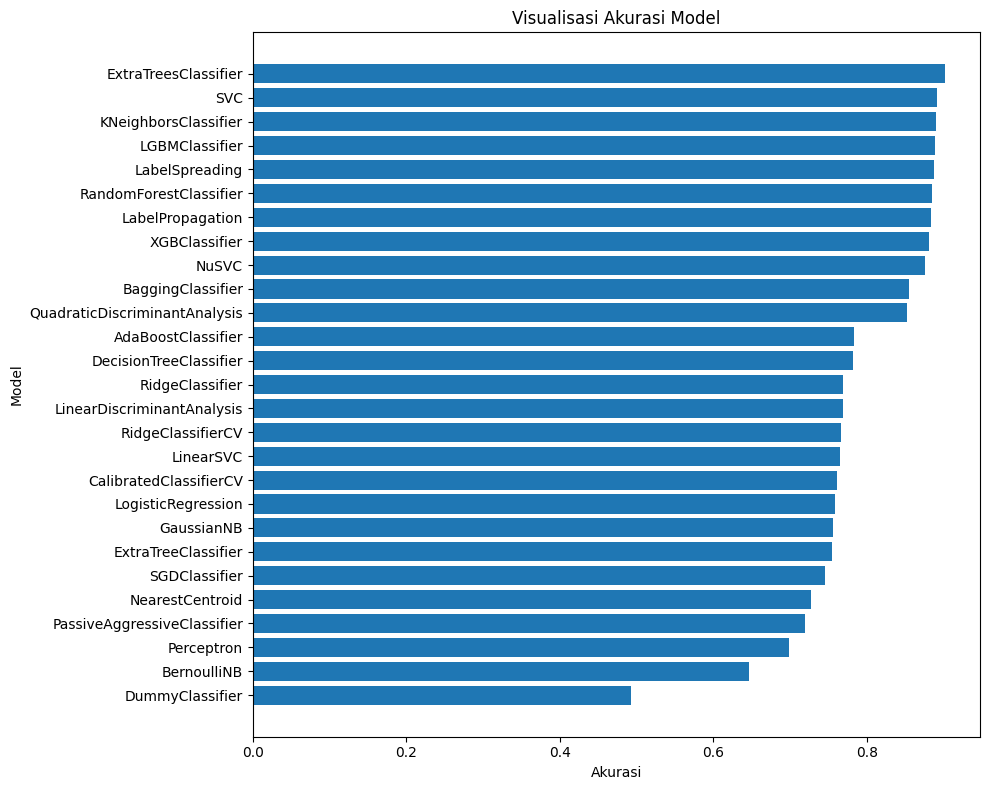

In [30]:
# Mengurutkan model berdasarkan akurasi dari yang terendah
# Ganti 'models' dengan 'hasil_model'
model_terurut = hasil_model.sort_values("Accuracy", ascending=True)

# Membuat visualisasi horizontal bar chart dari akurasi model
plt.figure(figsize=(10, 8))
plt.barh(model_terurut.index, model_terurut["Accuracy"])
plt.title("Visualisasi Akurasi Model")
plt.xlabel("Akurasi")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [31]:
# Membuat DataFrame kosong untuk menyimpan skor akurasi dari beberapa model klasifikasi
models = pd.DataFrame(data=None,
                      index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes', 'Extra trees classifier'])

## 4.1 KNN (K-Nearest Neighbor)

In [32]:
# Membuat dan melatih model K-Nearest Neighbors dengan jumlah tetangga = 5 dan pembobotan berdasarkan jarak
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [33]:
# Melakukan prediksi dengan model KNN pada data uji
# 'model_knn' was not defined. Changing to 'knn' which is how the model is instantiated in a previous cell.
prediksi_knn = knn.predict(x_test)

# Menyimpan nilai akurasi prediksi model KNN ke dalam DataFrame
models.at['accuracy_score', 'KNN'] = accuracy_score(y_test, prediksi_knn)

## 4.2 Random Forest ( decision trees )

In [34]:
# Membuat dan melatih model Random Forest dengan kedalaman maksimum pohon sebesar 20
rf_model = RandomForestClassifier(max_depth=20)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [35]:
# Menggunakan model Random Forest untuk memprediksi label data uji
# The model was instantiated as 'rf_model', not 'model_rf'
prediksi_rf = rf_model.predict(x_test)

# Menyimpan hasil akurasi ke dalam DataFrame models untuk algoritma Random Forest
models.at['accuracy_score', 'RandomForest'] = accuracy_score(y_test, prediksi_rf)

## 4.3 Support Vector Classifier ( SVC )

In [36]:
# Membuat dan melatih model Support Vector Classifier (SVC) tanpa parameter tambahan
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [37]:
# Melakukan prediksi pada data uji menggunakan model SVM
prediksi_svc = svc_model.predict(x_test)

# Menyimpan hasil akurasi model SVM ke dalam DataFrame models
models.at['accuracy_score', 'SVM'] = accuracy_score(y_test, prediksi_svc)

## 4.4 Naive Bayes

In [38]:
# Membuat dan melatih model Naive Bayes (varian Bernoulli) dengan data pelatihan
nb_model = BernoulliNB()
nb_model.fit(x_train, y_train)

BernoulliNB()

In [39]:
# Melakukan prediksi pada data uji menggunakan model Naive Bayes
prediksi_nb = nb_model.predict(x_test)

# Menyimpan nilai akurasi dari model Naive Bayes ke dalam tabel models
models.at['accuracy_score', 'Naive Bayes'] = accuracy_score(y_test, prediksi_nb)

## 4.5 Extra Trees Classifier

In [40]:
# Inisialisasi dan pelatihan model Extra Trees Classifier dengan parameter tertentu
etc_model = ExtraTreesClassifier(n_estimators=100, max_depth=10, n_jobs=2, random_state=100)
etc_model.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=10, n_jobs=2, random_state=100)

In [41]:
# Melakukan prediksi menggunakan model Extra Trees pada data uji
prediksi_etc = etc_model.predict(x_test)

# Menyimpan nilai akurasi ke dalam tabel models untuk Extra Trees Classifier
models.at['accuracy_score', 'Extra trees classifier'] = accuracy_score(y_test, prediksi_etc)

# 5. Evaluasi Model ( Mengevaluasi semua model )

## 5.1 Score Tiap Model

In [42]:
print(models)

                KNN RandomForest  SVM Naive Bayes Extra trees classifier
accuracy_score 0.90         0.89 0.89        0.64                   0.87


## 5.2 (boxplot) Untuk Visualisasi Model

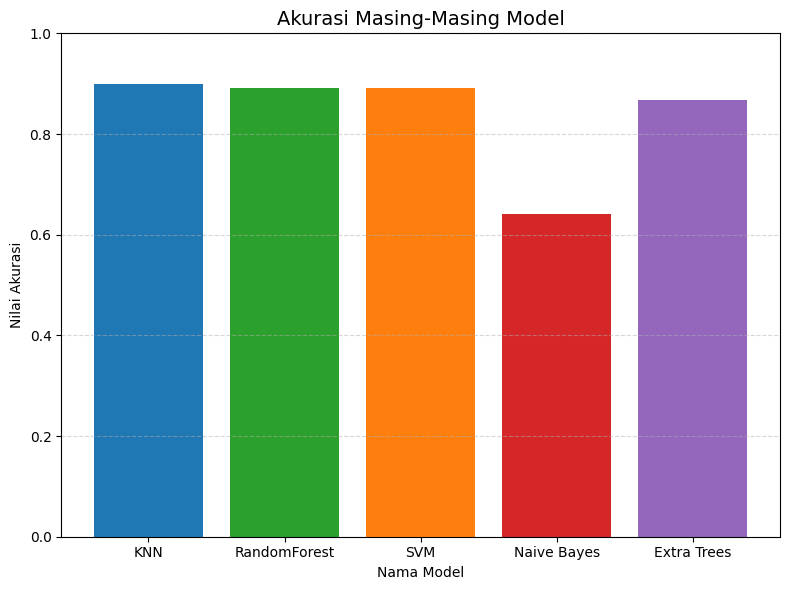

In [43]:
# Nama model dan nilai akurasi
model_names = ['KNN', 'RandomForest', 'SVM', 'Naive Bayes', 'Extra Trees']
accuracy_values = [
    models.loc['accuracy_score', 'KNN'],
    models.loc['accuracy_score', 'RandomForest'],
    models.loc['accuracy_score', 'SVM'],
    models.loc['accuracy_score', 'Naive Bayes'],
    models.loc['accuracy_score', 'Extra trees classifier']
]

# Warna berbeda untuk setiap model
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

# Plot batang berwarna
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values, color=colors)
plt.title("Akurasi Masing-Masing Model", fontsize=14)
plt.xlabel("Nama Model")
plt.ylabel("Nilai Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()